In [1]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math

In [2]:
import pandas as pd
import os
os.chdir('C:\\Users\\Shyam\\Documents\\GitHub\\beacondigest\\notebooks\\2021\\even more eip1559 paper\\random_forest_regression')

In [3]:
df1 = pd.read_csv('cryptodads-clean.csv',low_memory = False)
df1 = df1[df1['toaddress'] == '0xecdd2f733bd20e56865750ebce33f17da0bee461']
df1.head(5)

,detecttime,hash,status,gas,gasprice,curblocknumber,timepending,blockspending,replace,fromaddress,toaddress,nonce,type,basefeepergas,maxpriorityfeepergas,maxfeepergas
1763,2021-10-10T23:58:09.066Z,0xf98d88077417a4573cea3c19d3f4d28edfd03a6b4ced...,pending,46189,NaN,13393986,NaN,NaN,NaN,0x8caed19a238929e12cd488f4b7ba6e50ab17c1cb,0xecdd2f733bd20e56865750ebce33f17da0bee461,41,2,48285847341,1.500000e+09,6.999245e+10
8246,2021-10-10T23:50:59.050Z,0x2c12b09db836b80244a35f524fbb00a4bc94976121e9...,pending,155397,NaN,13393942,NaN,NaN,NaN,0x5fbfe8dab81a39a04b9590dfceac9a93e7aa3302,0xecdd2f733bd20e56865750ebce33f17da0bee461,124,2,63248131704,1.500000e+09,7.864466e+10
14296,2021-10-10T23:44:14.912Z,0xc18f4aa0c218d10b6d939cfa8ba3d2d4db7e0421f23d...,pending,46189,NaN,13393909,NaN,NaN,NaN,0x675c2f2d435f49a813869a7286f3a0a65ab73353,0xecdd2f733bd20e56865750ebce33f17da0bee461,38,2,64504861881,1.500000e+09,7.604824e+10
15231,2021-10-10T23:43:09.861Z,0xbc934ad1e71fc1cab15903cf87df82d0bb6f69b30ecb...,pending,96104,NaN,13393905,NaN,NaN,NaN,0xeab2f93ad71709832e17c861d397bcb1f7f96159,0xecdd2f733bd20e56865750ebce33f17da0bee461,124,2,52805893743,1.500000e+09,8.163746e+10
19172,2021-10-10T23:37:51.016Z,0x945d6e7f653fa0d36065d1defd7e59e359151034f332...,pending,103598,NaN,13393880,NaN,NaN,NaN,0x5059b080a16e9176f9e61e26a7e3944b1c13a8f7,0xecdd2f733bd20e56865750ebce33f17da0bee461,57,2,47948758449,1.500000e+09,6.694627e+10


In [6]:
df1_counts = df1['curblocknumber'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df1_counts.head(5)

,unique_values,counts
0,13390347,3
1,13390337,2
2,13393673,2
3,13389929,2
4,13389977,2


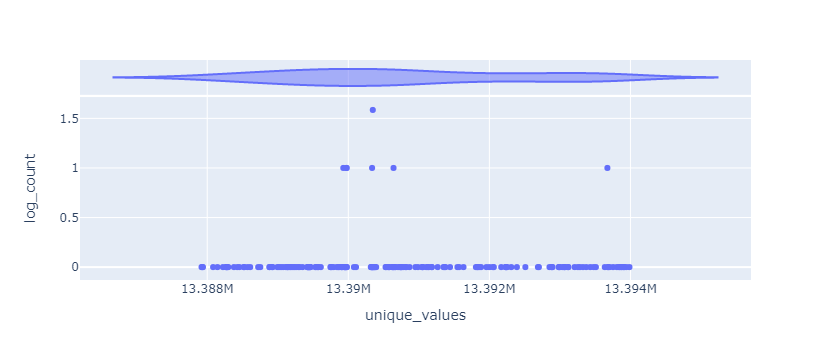

In [9]:
df1_counts['log_count'] = np.log2(df1_counts['counts'])
fig = px.scatter(df1_counts, x="unique_values", y="log_count", marginal_x="violin")
fig.show()

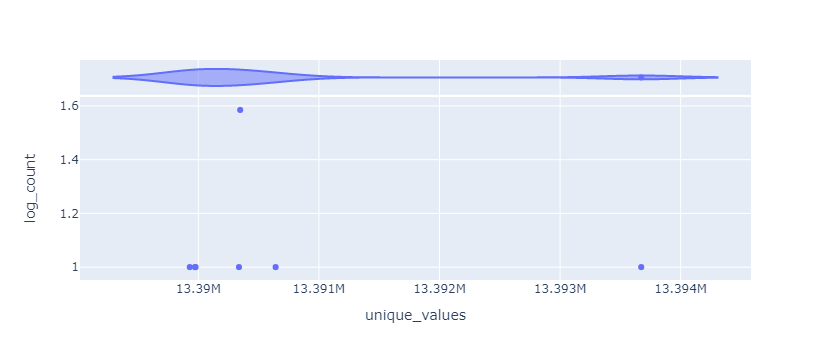

In [10]:
df1_counts1 = df1_counts[df1_counts['log_count'] > 0]
fig = px.scatter(df1_counts1, x="unique_values", y="log_count", marginal_x="violin")
fig.show()